# Activity 9.3: The Airports Case Study

In [1]:
# Nahom Diress
import pandas as pd
import seaborn as sns

# Tasks and Questions

In [5]:
# 1 Read the CSV file 
tsa = pd.read_csv('tsa_claims.csv')

C:\Users\nahom\AppData\Local\Temp\ipykernel_32300\2024060671.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tsa = pd.read_csv('tsa_claims.csv')


In [6]:
# 2 Display Information about your data
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94848 entries, 0 to 94847
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Claim Number   94848 non-null  object 
 1   Date Received  94848 non-null  object 
 2   Incident Date  94848 non-null  object 
 3   Airport Code   94848 non-null  object 
 4   Airport Name   94848 non-null  object 
 5   Airline Name   94848 non-null  object 
 6   Claim Type     94848 non-null  object 
 7   Claim Site     94848 non-null  object 
 8   Item           94848 non-null  object 
 9   Claim Amount   94848 non-null  float64
 10  Status         94848 non-null  object 
 11  Close Amount   94848 non-null  float64
 12  Disposition    94848 non-null  object 
dtypes: float64(2), object(11)
memory usage: 9.4+ MB


In [22]:
# 3 Perform additional cleaning or preparation, like datetime(), for future tasks and questions
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])
tsa['Incident Date'] = pd.to_datetime(tsa['Incident Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94848 entries, 0 to 94847
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Claim Number   94848 non-null  object        
 1   Date Received  94848 non-null  datetime64[ns]
 2   Incident Date  94848 non-null  datetime64[ns]
 3   Airport Code   94848 non-null  object        
 4   Airport Name   94848 non-null  object        
 5   Airline Name   94848 non-null  object        
 6   Claim Type     94848 non-null  object        
 7   Claim Site     94848 non-null  object        
 8   Item           94848 non-null  object        
 9   Claim Amount   94848 non-null  float64       
 10  Status         94848 non-null  object        
 11  Close Amount   94848 non-null  float64       
 12  Disposition    94848 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 9.4+ MB


In [23]:
# 4 Display Information about your data again to verify
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94848 entries, 0 to 94847
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Claim Number   94848 non-null  object        
 1   Date Received  94848 non-null  datetime64[ns]
 2   Incident Date  94848 non-null  datetime64[ns]
 3   Airport Code   94848 non-null  object        
 4   Airport Name   94848 non-null  object        
 5   Airline Name   94848 non-null  object        
 6   Claim Type     94848 non-null  object        
 7   Claim Site     94848 non-null  object        
 8   Item           94848 non-null  object        
 9   Claim Amount   94848 non-null  float64       
 10  Status         94848 non-null  object        
 11  Close Amount   94848 non-null  float64       
 12  Disposition    94848 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 9.4+ MB


In [55]:
# A: What is the most common type of insurance claim?
tsa['Claim Type'].value_counts()

Claim Type
Passenger Property Loss    60265
Property Damage            33730
Passenger Theft              331
Employee Loss (MPCECA)       308
Personal Injury              208
Motor Vehicle                  6
Name: count, dtype: int64

In [56]:
# B: Which claim site within the airport are claims most commonly filed for?
tsa['Claim Site'].value_counts()

Claim Site
Checked Baggage    80553
Checkpoint         14013
Other                280
Motor Vehicle          2
Name: count, dtype: int64

In [76]:
# C: What type of claim is made most at each claim site?
claim_counts = tsa.groupby(['Claim Site', 'Claim Type'])
claim_counts.size()

Claim Site       Claim Type             
Checked Baggage  Employee Loss (MPCECA)       275
                 Motor Vehicle                  4
                 Passenger Property Loss    53364
                 Passenger Theft              294
                 Personal Injury               89
                 Property Damage            26527
Checkpoint       Employee Loss (MPCECA)        32
                 Motor Vehicle                  1
                 Passenger Property Loss     6740
                 Passenger Theft               36
                 Personal Injury              112
                 Property Damage             7092
Motor Vehicle    Passenger Property Loss        2
Other            Employee Loss (MPCECA)         1
                 Motor Vehicle                  1
                 Passenger Property Loss      159
                 Passenger Theft                1
                 Personal Injury                7
                 Property Damage              111
dtype: in

In [82]:
# D: What is the average claim amount?
tsa['Claim Amount'].mean()

3632.6011140983464

In [100]:
# E: If a claim is approved or settled, what percent of the claim amount do the airports pay?
claim_status = tsa.groupby('Status').agg({'Claim Amount': 'mean', 'Close Amount': 'mean'})
claim_status

,Claim Amount,Close Amount
Status,,
Approved,148.252741,147.522242
Canceled,260.440000,140.048333
Denied,6212.980462,9.011792
Pending response from claimant,1359.000000,559.000000
Settled,550.152134,235.597360


In [104]:
# F: What are the five airports with the most claims?
tsa['Airport Name'].value_counts().head()

Airport Name
Los Angeles International Airport       4492
John F. Kennedy International           3835
Chicago O'Hare International Airport    3620
Newark International Airport            3594
Miami International Airport             2986
Name: count, dtype: int64

<Axes: xlabel='Date Received', ylabel='Close Amount'>

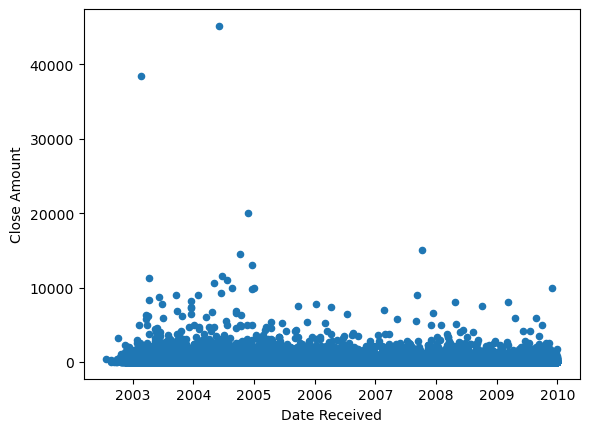

In [105]:
# G: Has the total close amounts increased or decreased over time, or do they appear to have remained steady?
tsa.plot.scatter(x= 'Date Received', y= 'Close Amount')
# It look like it has stayed consistent throughout the years